In [1]:
!pip install matplotlib
!pip install numpy
!pip install scipy

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

# Numpy -  multidimensional data arrays

## Introduction

Numpy is not part of the "standard library", but it might as well be for engineers. Numpy is Python's answer to Matlab - the "back end" is implemented in C so its performance is very fast (comparable to Matlab).

In [3]:
import numpy as np

## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.
* reading data from files

In [4]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])

print(v)


# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])

print(M)

type(v), type(M)

[1 2 3 4]
[[1 2]
 [3 4]]


(numpy.ndarray, numpy.ndarray)

### Creating arrays with functions

It is often more efficient to generate large arrays instead of creating them from lists. There are a few useful functions for this in numpy:

* `np.arange` - create a range with a specified step size (endpoints not included)
* `np.linspace` - create a range with a specified number of points (endpoints *are* included)
* `np.logspace` - create a range with a specified number of points in log space (endpoints *are* included)
* `np.mgrid` - create points on a multi-dimensional grid (similar to meshgrid in matlab)
* `np.random.rand` - create random number matrix from a uniform distribution
* `np.random.randn` - create random number matrix from a standard normal distribution
* `np.zeros` - create a matrix of zeros
* `np.ones` - create a matrix of ones
* `np.eye` - create identity matrix

## Manipulating arrays

Once we generate `numpy` arrays, we need to interact with them. This involves a few operations:

* indexing - accessing certain elements
* index "slicing" - accessing certain subsets of elements
* fancy indexing - combinations of indexing and slicing

This is not very different from Matlab.

### Index slicing

Index slicing is the name for the syntax `M[lower:upper:step]` to extract a subset of an array.

## Activity:

In [5]:
V = np.random.rand(4)*100+5
print(V[1:4:2])



[18.03952848 85.00797049]


# matplotlib - Plotting in Python

Matplotlib has advantages:

* Easy to get started (MATLAB-like interface)
* Support for LaTeX formatted labels and texts
* Output in many formats, including PNG, PDF, SVG, EPS, and PGF.
* Extensive gallery of examples with source code (https://matplotlib.org/gallery.html)
* Programmatic control over all aspects of figures

Programmatic control is a blessing and a curse...

Other plotting tools are available (Plotly, Bokeh, D3, ...) but `matplotlib` is the workhorse.

Matplotlib can be used in two ways:

* `pylab` modules (works like MATLAB)
* object-oreinted interface (harder but more powerful)

In [6]:
%matplotlib inline

## MATLAB-like API

The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib. 

It is designed to be compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB.

To use this API from matplotlib, we need to include the symbols in the `pylab` module: 

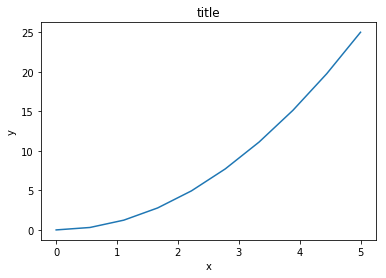

In [7]:
from pylab import *

x = np.linspace(0, 5, 10)
y = x ** 2

figure()
plot(x, y)
xlabel('x')
ylabel('y')
title('title')
show()

Most of the plotting related functions in MATLAB are covered by the `pylab` module. For example, subplot and color/symbol selection:

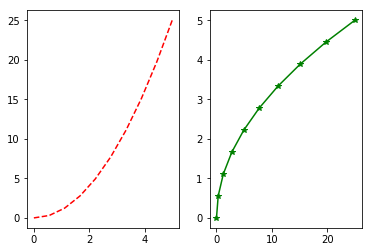

In [8]:
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');

## The matplotlib object-oriented interface

The `pylab` interface is easy, but limited.

* Use simple global functions that match with MATLAB
* Objects are implicitly defined and hidden from users.

The `pyplot` object-oriented interface is harder to learn, but much more powerful.

* Use objects instead of global functions.
* Explicitly define objects - much better for multiple figures.

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

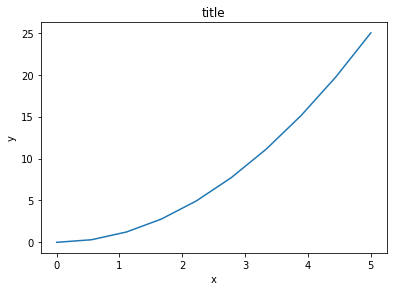

In [10]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

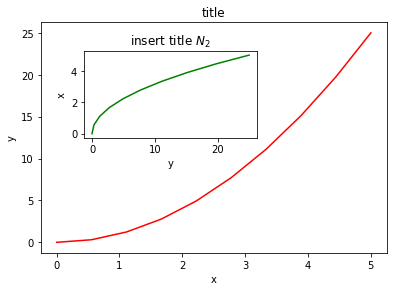

In [11]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title $N_2$');

### Saving figures

To save a figure to a file we can use the `savefig` method in the `Figure` class. You can output in many formats, but the most common are:

* PNG (raster)
* JPG (raster)
* SVG (vector)
* PDF (vector)

The SVG and PDF formats are great because they can be edited afterward with vector graphics programs like Inkscape or Adobe Illustrator.

In [12]:
fig.savefig('cool_plot.pdf')

## The Gallery

Matplotlib is a complicated library. The matplotlib gallery is the most useful resource for learning matplotlib

https://matplotlib.org/gallery.html

## Activity: get a few plots from the matplotlib gallery (plots that does not import data) and get them running below

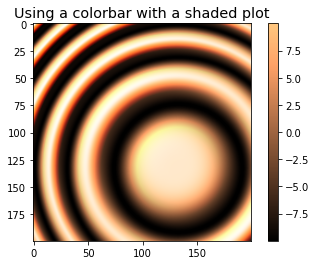

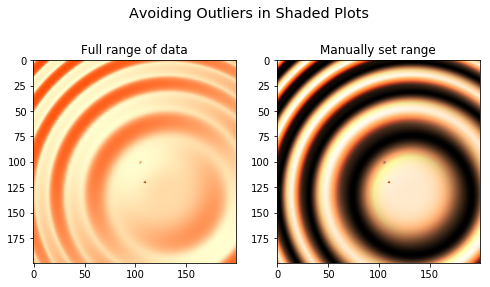

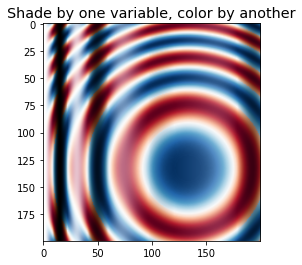

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, Normalize


def display_colorbar():
    """Display a correct numeric colorbar for a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    cmap = plt.cm.copper
    ls = LightSource(315, 45)
    rgb = ls.shade(z, cmap)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')

    # Use a proxy artist for the colorbar...
    im = ax.imshow(z, cmap=cmap)
    im.remove()
    fig.colorbar(im)

    ax.set_title('Using a colorbar with a shaded plot', size='x-large')


def avoid_outliers():
    """Use a custom norm to control the displayed z-range of a shaded plot."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z = 10 * np.cos(x**2 + y**2)

    # Add some outliers...
    z[100, 105] = 2000
    z[120, 110] = -9000

    ls = LightSource(315, 45)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4.5))

    rgb = ls.shade(z, plt.cm.copper)
    ax1.imshow(rgb, interpolation='bilinear')
    ax1.set_title('Full range of data')

    rgb = ls.shade(z, plt.cm.copper, vmin=-10, vmax=10)
    ax2.imshow(rgb, interpolation='bilinear')
    ax2.set_title('Manually set range')

    fig.suptitle('Avoiding Outliers in Shaded Plots', size='x-large')


def shade_other_data():
    """Demonstrates displaying different variables through shade and color."""
    y, x = np.mgrid[-4:2:200j, -4:2:200j]
    z1 = np.sin(x**2)  # Data to hillshade
    z2 = np.cos(x**2 + y**2)  # Data to color

    norm = Normalize(z2.min(), z2.max())
    cmap = plt.cm.RdBu

    ls = LightSource(315, 45)
    rgb = ls.shade_rgb(cmap(norm(z2)), z1)

    fig, ax = plt.subplots()
    ax.imshow(rgb, interpolation='bilinear')
    ax.set_title('Shade by one variable, color by another', size='x-large')

display_colorbar()
avoid_outliers()
shade_other_data()
plt.show()

 # SciPy - Library of scientific algorithms for Python

The SciPy framework builds on top of the low-level NumPy framework for multidimensional arrays, and provides a large number of higher-level scientific algorithms. Today we will discuss a few that are most useful for the average scientist:

* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))



## Linear Regression

Linear regression is very easy in scipy.

In [14]:
x = np.arange(0,11,1)  #make some data
y = 3*x+1
y = y.astype('float64')
y += np.random.randn(len(x))

(3.011150295626737, 1.3213212010357012)


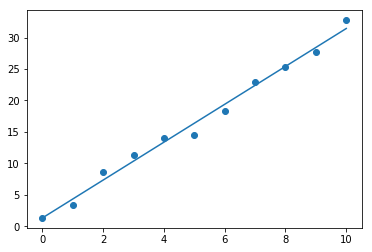

In [15]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(slope,intercept)

plt.scatter(x,y)
plt.plot(x,x*slope+intercept)

## Polynomial fitting is not recommended

Fitting data to polynomials is quite easy, but often a very bad solution for complex models.

* higher orders very sensative
* very easy to overfit
* missing the true complexity of your system

that said, here's how to do a polynomial fit

polynomial fitting is easiest in numpy with `np.polyfit`

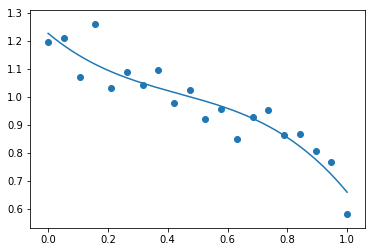

In [16]:
x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20) #clearly not a polynomial, but we can fit it
coefficients = np.polyfit(x, y, 3) #find the coefficients
p = np.poly1d(coefficients)#pass the coefficients into np.poly1d to make a function

t = np.linspace(0, 1, 200)
plt.scatter(x, y)
plt.plot(t,p(t),'-')
plt.show()

But what about if we continue to add orders to the polynomial? Let's plot the error as we increase the order. Write a for loop that evaluates the sum of squaared error for polynomial models of order 1-14 for the above x,y data 

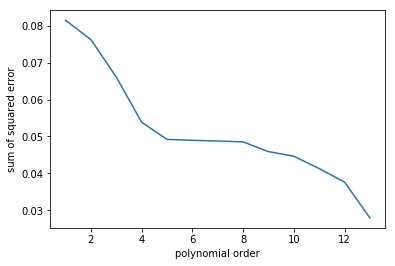

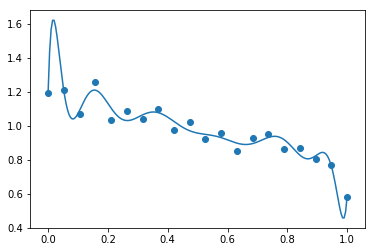

In [17]:
err = []
poly_range = range(1,14)

for i in poly_range:
    coefficients = np.polyfit(x, y, i)
    p = np.poly1d(coefficients)
    err.append(sum((y-p(x))**2)) ###that's the sum of squared error

plt.plot(range(1,14),err)
plt.ylabel('sum of squared error')
plt.xlabel('polynomial order')
plt.figure()
plt.scatter(x, y)
plt.plot(t,p(t),'-')

Is this good?

## Introducing the Bayesian information criterion

Bayesian information criterion (BIC) attempts to balance the complexity of a model with its goodness of fit, it is defined to be:

$ BIC = n*\ln{(\sigma^2_e)} + k*\ln(n)$

where $n$ is the number of data points, $\sigma_e$ is the standard deviation of the error, and $k$ is the number of parameters.

(Lower BIC is better)

In [25]:
#here's a function that implements it
def BIC(y, yhat, k, weight = 1):
    err = y - yhat
    sigma = np.std(np.real(err))
    n = len(y)
    B = n*np.log(sigma**2) + weight*k*np.log(n)
    return B

h = BIC(y,p(x),3)
print(h)

-5927.510688620458


Let's repeat our analysis plotting the BIC, take a few minutes to do that

Text(0.5,0,u'polynomial order')

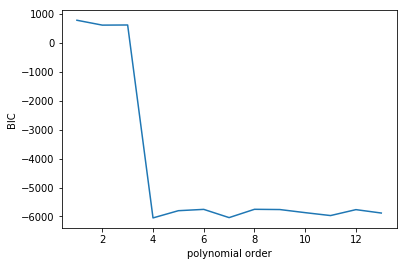

In [26]:
err = []
poly_range = range(1,14)
for i in poly_range:
    coefficients = np.polyfit(x, y, i)
    p = np.poly1d(coefficients)
    err.append(BIC(y,p(x),i))

plt.plot(range(1,14),err)
plt.ylabel('BIC')
plt.xlabel('polynomial order')

Tools like BIC help guard against overfitting

## Use Scipy Curve Fitting

Let's extend our curve fitting to any function using scipy's `curve_fit` function. This enables us to perform non-linear curve fitting.


[-0.47780128  1.21287626]


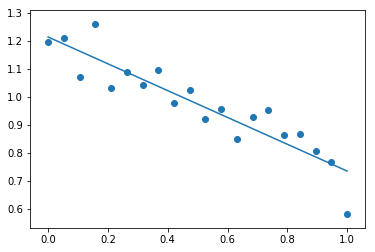

In [20]:
from scipy.optimize import curve_fit

def line(x,m,b):
    return m*x+b

params, params_covariance = curve_fit(line,x,y)


print(params)
plt.figure()
plt.scatter(x,y)
plt.plot(np.linspace(x[0],x[-1],100),line(np.linspace(x[0],x[-1],100),*params))  #note passing in aruguments with *

re-write the above to fit an exponenial function:

$y = Ae^{kx}+C$

(rerun the cell if the regression does not converge)

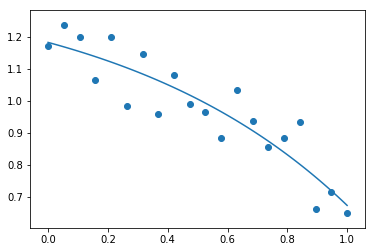

In [21]:
x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20) 
from scipy.optimize import curve_fit

def line(x,A,k,C):
    return A*np.exp(k*x) + C

params, params_covariance = curve_fit(line,x,y)

plt.figure()
plt.scatter(x,y)
plt.plot(np.linspace(x[0],x[-1],100),line(np.linspace(x[0],x[-1],100),*params))

## Optimization

Optimization (finding minima or maxima of a function) is a large field in mathematics, and optimization of complicated functions or in many variables can be rather involved. Here we will only look at a few very simple cases. For a more detailed introduction to optimization with SciPy see: http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

### Finding a minima

Let's first look at how to find the minima of a simple function of a single variable:

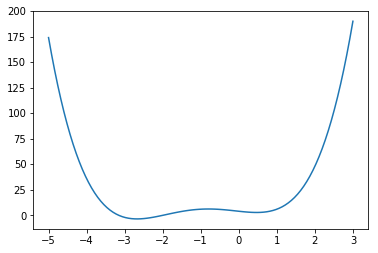

In [22]:
from scipy import optimize

def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
y = f(x)
ax.plot(x, y);

There are many types of optimizers available. We will use the common `BFGS` and `CG` optimizers here, but you can read more in the [documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html).

In [28]:
from scipy.optimize import minimize
x_min = minimize(f, -1, method='CG')  #minimize can take any kind of function, with any number of variables
# method?
# output?
print(x_min.x)

[-2.67298164]


Lectures 3+4 of Johanssen: [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures)

Scipy:
* http://www.scipy.org - The official web page for the SciPy project.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - A tutorial on how to get started using SciPy. 
* https://github.com/scipy/scipy/ - The SciPy source code. 

Matplotlib:
* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
